# Testing Locally your model conversion

In [1]:
from tdstone2.tdsgenai import run_tds_vector_embedding_script_locally 
import pandas as pd

2024-12-20 09:32:50 - WARNING - From C:\Users\dm250067\AppData\Local\anaconda3\envs\vantage_python\Lib\site-packages\tf_keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.

2024-12-20 09:32:50 - INFO - PyTorch version 2.4.1 available.
2024-12-20 09:32:50 - INFO - TensorFlow version 2.17.0 available.


## Dataset as pandas dataframe

In [2]:
# Define the three types of software problems and corresponding questions
problems_data = {
    "Problem_Type": ["Installation Issue", "Performance Issue", "Functionality Issue"],
    "User_Question": [
        [
            "Why can't I install the software on my machine?",
            "What do I do if the installer keeps crashing?",
            "How do I resolve dependency errors during installation?",
            "Why is my antivirus blocking the software installation?"
        ],
        [
            "Why is the software running so slowly?",
            "How do I fix memory issues causing the software to crash?",
            "What can I do if the software takes too long to load?",
            "Why is the CPU usage so high when using the software?"
        ],
        [
            "Why is the 'Save' button not working?",
            "How do I troubleshoot errors when trying to export data?",
            "Why does the software keep freezing when I try to open certain files?",
            "What should I do if features are missing after an update?"
        ]
    ]
}

# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame(problems_data)

# Expanding the dataframe so each row corresponds to one question
expanded_rows = []

for index, row in df.iterrows():
    problem_type = row["Problem_Type"]
    questions = row["User_Question"]
    for question in questions:
        expanded_rows.append({"Problem_Type": problem_type, "User_Question": question})

# Create a new DataFrame with the expanded rows
df = pd.DataFrame(expanded_rows)
df['id'] = df.index
df

,Problem_Type,User_Question,id
0,Installation Issue,Why can't I install the software on my machine?,0
1,Installation Issue,What do I do if the installer keeps crashing?,1
2,Installation Issue,How do I resolve dependency errors during inst...,2
3,Installation Issue,Why is my antivirus blocking the software inst...,3
4,Performance Issue,Why is the software running so slowly?,4
5,Performance Issue,How do I fix memory issues causing the softwar...,5
6,Performance Issue,What can I do if the software takes too long t...,6
7,Performance Issue,Why is the CPU usage so high when using the so...,7
8,Functionality Issue,Why is the 'Save' button not working?,8
9,Functionality Issue,How do I troubleshoot errors when trying to ex...,9


## Converted model

In [3]:
# Define the arguments
zip_file_path      = "models/BAAI_bge-small-en-v1.5/"  # Replace with actual path
text_column        = 'User_Question'  # Assuming 'text' column is at index 0
accumulate_columns = ['id', 'Problem_Type']  # Indices of other columns to accumulate

# Run the script
output = run_tds_vector_embedding_script_locally(df, zip_file_path, text_column, accumulate_columns)
output

2024-12-20 09:32:51 - INFO - Starting the vector embedding script.
2024-12-20 09:32:51 - INFO - Dataframe converted to tab-delimited format.
2024-12-20 09:32:51 - INFO - Text column: 1, Accumulate columns: [2, 0]
2024-12-20 09:32:51 - INFO - Running script with arguments: ['C:\\Users\\dm250067\\AppData\\Local\\anaconda3\\envs\\vantage_python\\python.exe', 'c:\\users\\dm250067\\onedrive - teradata\\documents\\01 - code development\\tdstone2\\tdstone2\\data\\tds_vector_embedding.py', 'models/BAAI_bge-small-en-v1.5/', '1', '[2, 0]']
2024-12-20 09:32:53 - INFO - Script executed successfully.
2024-12-20 09:32:53 - INFO - Processing script output into DataFrame.
2024-12-20 09:32:53 - INFO - ['0', 'Installation Issue', '2a60d9a2-6e14-412e-bbfc-b3771939b4bc', '0.421875', '0.7059762477874756', '384', 'models/BAAI_bge-small-en-v1.5/', '{"V0": -0.11932892352342606, "V1": -0.0187166016548872, "V2": 0.01761515811085701, "V3": -0.05898892879486084, "V4": 0.004349111579358578, "V5": -0.03952726349234

,id,Problem_Type,jobid,process_time,elapsed_time,Vector_Dimension,Model,V0,V1,V2,...,V374,V375,V376,V377,V378,V379,V380,V381,V382,V383
0,0,Installation Issue,2a60d9a2-6e14-412e-bbfc-b3771939b4bc,0.421875,0.7059762477874756,384,models/BAAI_bge-small-en-v1.5/,-0.119329,-0.018717,0.017615,...,0.024291,-0.018184,0.014795,-0.057981,0.006814,0.076530,-0.068294,0.106736,0.020194,-0.037946
1,1,Installation Issue,2a60d9a2-6e14-412e-bbfc-b3771939b4bc,0.046875,0.1030721664428711,384,models/BAAI_bge-small-en-v1.5/,-0.087563,0.005275,0.033683,...,0.063681,-0.048047,0.039917,-0.015515,-0.002514,0.010172,-0.027737,0.126346,-0.047146,0.001873
2,2,Installation Issue,2a60d9a2-6e14-412e-bbfc-b3771939b4bc,0.109375,0.10741639137268066,384,models/BAAI_bge-small-en-v1.5/,-0.047471,0.009223,0.062287,...,-0.025913,0.013467,0.023248,-0.046555,0.010657,0.027492,-0.039499,0.094628,-0.014458,-0.055770
3,3,Installation Issue,2a60d9a2-6e14-412e-bbfc-b3771939b4bc,0.046875,0.10971713066101074,384,models/BAAI_bge-small-en-v1.5/,-0.092628,0.003623,0.010606,...,-0.017786,-0.002649,0.032130,-0.070919,-0.000180,0.026290,-0.059635,0.052269,-0.007231,0.005847
4,4,Performance Issue,2a60d9a2-6e14-412e-bbfc-b3771939b4bc,0.078125,0.10636568069458008,384,models/BAAI_bge-small-en-v1.5/,-0.093795,-0.014368,-0.002448,...,0.044986,-0.030441,0.037631,-0.032483,-0.051908,0.028307,-0.078708,0.052131,0.016756,-0.008292
5,5,Performance Issue,2a60d9a2-6e14-412e-bbfc-b3771939b4bc,0.015625,0.10582661628723145,384,models/BAAI_bge-small-en-v1.5/,-0.063023,0.013536,0.044957,...,0.016413,-0.027284,0.008859,-0.053631,-0.020558,0.019059,-0.060335,0.033367,-0.039840,-0.025385
6,6,Performance Issue,2a60d9a2-6e14-412e-bbfc-b3771939b4bc,0.0625,0.11588168144226074,384,models/BAAI_bge-small-en-v1.5/,-0.111898,-0.023253,0.037375,...,0.029645,0.031222,0.037332,-0.016274,-0.067673,0.030364,-0.068334,0.038478,-0.071355,-0.014671
7,7,Performance Issue,2a60d9a2-6e14-412e-bbfc-b3771939b4bc,0.015625,0.12367939949035645,384,models/BAAI_bge-small-en-v1.5/,-0.055327,0.001684,0.000338,...,0.004289,-0.068598,0.024455,-0.016557,-0.016133,0.058760,-0.029320,-0.017033,-0.000319,-0.033597
8,8,Functionality Issue,2a60d9a2-6e14-412e-bbfc-b3771939b4bc,0.015625,0.10869550704956055,384,models/BAAI_bge-small-en-v1.5/,-0.078147,0.003277,0.029160,...,0.017802,-0.027755,0.020608,0.009976,0.031661,0.050931,-0.003053,0.143568,-0.059602,-0.004136
9,9,Functionality Issue,2a60d9a2-6e14-412e-bbfc-b3771939b4bc,0.046875,0.10495328903198242,384,models/BAAI_bge-small-en-v1.5/,-0.049591,-0.037886,0.044151,...,0.018791,0.030332,0.003716,-0.045727,-0.002926,0.054017,-0.122882,0.006341,-0.026157,-0.009929


## Native Model

In [4]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('BAAI/bge-small-en-v1.5')

2024-12-20 09:32:53 - INFO - Use pytorch device_name: cuda
2024-12-20 09:32:53 - INFO - Load pretrained SentenceTransformer: BAAI/bge-small-en-v1.5


In [5]:
sentence = df.iloc[0,1]
sentence

"Why can't I install the software on my machine?"

In [6]:
model.encode(sentence)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\dm250067\AppData\Local\anaconda3\envs\vantage_python\Lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


array([-1.19328909e-01, -1.87166296e-02,  1.76151097e-02, -5.89889809e-02,
        4.34908131e-03, -3.95272896e-02, -8.64124596e-02,  1.68419424e-02,
       -8.01245589e-03, -4.03042175e-02,  5.25421798e-02, -3.81385051e-02,
        8.00429061e-02, -6.81807026e-02,  3.42032537e-02,  5.03394753e-02,
        1.27808386e-02,  9.25269537e-03,  2.10044719e-02, -9.10058152e-03,
       -1.30352937e-02,  1.07554216e-02, -4.54434529e-02, -4.66270819e-02,
       -6.97404295e-02,  8.03196430e-02, -2.32201200e-02, -3.24648507e-02,
       -5.63009754e-02, -1.01680003e-01, -5.16864918e-02, -3.57231312e-02,
        2.61536408e-02,  4.22137417e-03,  1.07769996e-01,  6.90902025e-03,
       -8.53230618e-03, -1.13789886e-02, -4.30131704e-02, -3.56808305e-02,
       -2.59450823e-02, -7.22736632e-03, -1.13334782e-01, -3.91243063e-02,
        6.15566708e-02, -4.31937352e-02, -1.18393367e-02,  3.48097607e-02,
        1.18962407e-01, -3.13509889e-02, -2.14892812e-02,  4.40774746e-02,
       -5.23547037e-03,  

In [7]:
output_result = output.iloc[0,7::]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Text(0.5, 1.0, "Why can't I install the software on my machine?")

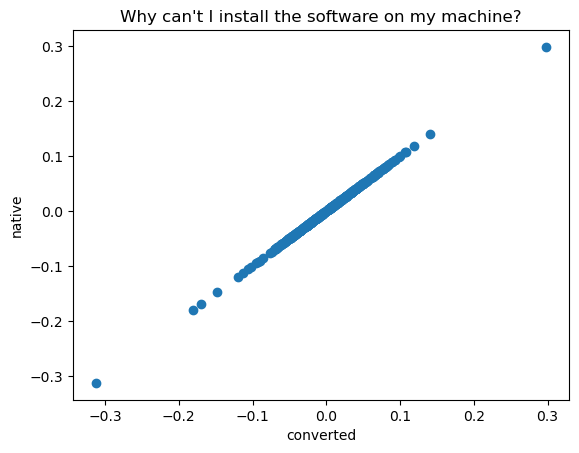

In [8]:
import matplotlib.pyplot as plt
plt.scatter(output_result, model.encode(sentence))
plt.xlabel('converted')
plt.ylabel('native')
plt.title(sentence)